<a href="https://colab.research.google.com/github/rlehrter-blm/Drought-Tools/blob/main/PalmerDroughtSeverityIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The PDSI is a standardized index based on a simplified soil water balance and estimates relative soil moisture conditions.

This new experimental implementation of the Palmer Drought Severity Index (PDSI) updates every 5 days, with a delay of 4 to 5 days, using the high-resolution gridMET gridded research dataset and USDA STATSGO soils data. A PDSI value >4 represents very wet conditions, while a PDSI <-4 represents an extreme drought. 

Learn more about the data [here](https://www.drought.gov/data-maps-tools/us-gridded-palmer-drought-severity-index-pdsi-gridmet#:~:text=The%20PDSI%20is%20a%20standardized,4%20represents%20an%20extreme%20drought.).

In [6]:
#Import/Install Packages
import datetime
import os
import requests
import time
      
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
requests.packages.urllib3.disable_warnings(requests.packages.urllib3.exceptions.InsecureRequestWarning)

In [7]:
# Set root URL for API requests
root_url = 'https://api.climateengine.org/'
# Authentication info for the API (INSERT YOUR OWN KEY)
headers = {'Authorization': ''}

In [8]:
#Set up start and end dates (1 year ago to today)
today = datetime.date.today()

delta = datetime.timedelta(days=365)
days_ago_365 = today - delta

today = today.strftime('%Y-%m-%d')

days365 = days_ago_365.strftime('%Y-%m-%d')

**Specify Time Frame of Analysis:** The script is set, by default, to pull the last 365 days of data. To adjust the time frame, enter a new start and/or end date in the code below typing the date in the following format, with apostrophes: 'YYYY-MM-DD'

**Specify Location of Analysis:** Enter the coordinates for a centroid of your study area in decimal degrees.

In [9]:
#1 Year SPI from GRIDMET
# Endpoint
endpoint1 = 'timeseries/native/points'

# Set up parameters for API call
params1 = {
    'dataset': 'GRIDMET_DROUGHT',
    'variable': 'pdsi',
    'start_date': days365,
    'end_date': today,
    'coordinates': '[[-121.98,39.03]]',
    'area_reducer': 'mean'
}
# Send request to the API
r1 = requests.get(root_url + endpoint1, params=params1, headers=headers, verify=False)
response1 = r1.json()

In [10]:
#response (may need to unpack with [] around timeseries the first time)
[timeseries] = response1

#Select Data
data = timeseries['Data']

# Convert to dataframe
df1 = pd.DataFrame.from_dict(data)
print(df1)

#Export CSV
#df1.to_csv('ltb_mean_42year.csv')

#Filter out non-available data i.e. values of -9999.000
df2 = df1[df1['pdsi']>-10]

#Format dates for plotting
df2['Date'] = pd.to_datetime(df2['Date'])

#Set x values to date variable
date1 = df2['Date']

#Set y values to value variable
value1 = df2['pdsi']

          Date  pdsi
0   2022-03-31 -4.29
1   2022-04-05 -4.41
2   2022-04-10 -4.52
3   2022-04-15 -4.64
4   2022-04-20 -4.69
..         ...   ...
67  2023-03-01 -0.75
68  2023-03-06 -0.75
69  2023-03-11 -0.68
70  2023-03-16 -0.53
71  2023-03-21  2.14

[72 rows x 2 columns]


Optional: Adjust fonts, labels, headers, text size and other aspects of the plot below, if desired. 

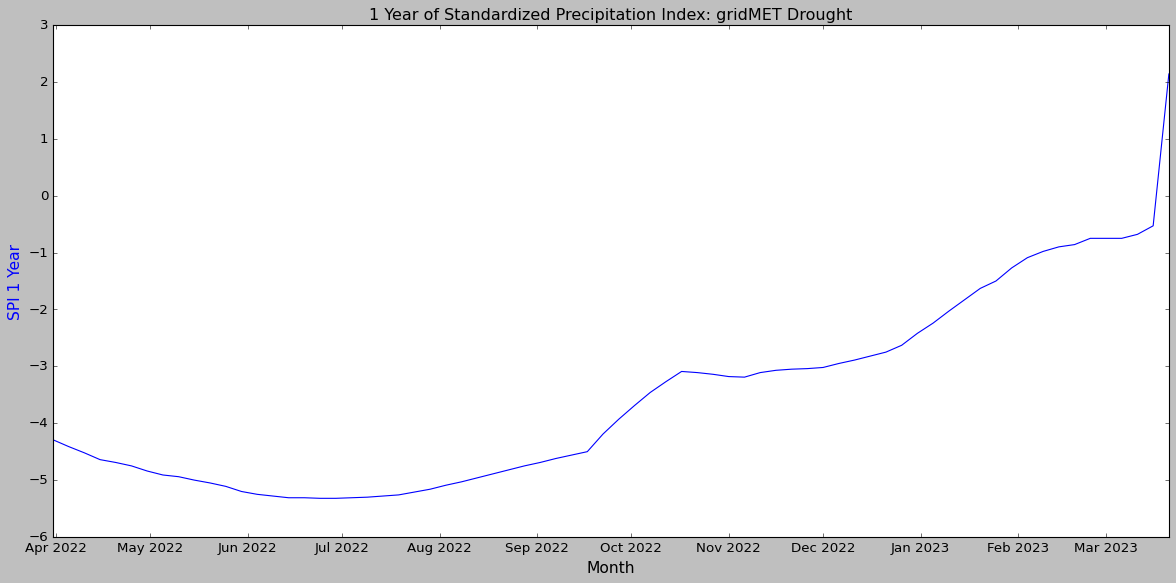

In [13]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (18,8))

# make a plot
ax.plot(date1, value1, color="blue")

#Add x-axis label
ax.set_xlabel("Month", fontsize = 14)

#Add y-axis label
ax.set_ylabel("PDSI 1 Year", color="blue", fontsize=14)

#Add Title
plt.title('1 Year of Palmer Drought Severity Index (PDSI): Gridmet Data')

#Export Graph
plt.savefig('SPI.png', bbox_inches='tight')

#Show Graph
plt.show()

**How to interpret the above plot:**

The magnitude of PDSI indicates the severity of the departure from normal conditions. A PDSI value >4 represents very wet conditions, while a PDSI <-4 represents an extreme drought. 